<a href="https://colab.research.google.com/github/NaraCrein/Digital_cafedra/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

**Pandas** это высокоуровневая Python библиотека для анализа данных. 

В экосистеме Python, pandas является наиболее продвинутой и быстроразвивающейся библиотекой для обработки и анализа данных.

Pandas добавляет в Python новые структуры данных — **Series** и **DataFrame**. 

Для подключения и использования библиотеки, её необходимо подключить следующей командой:


```
import pandas as pd
```

Конструкция `as`  позволяет переименовать библиотеку в более короткое название для удобства в дальнейшем при обращении к этой библиотеке и ее методам.



In [ ]:
import pandas as pd

##Структура данных Series

**Series** - одномерные массивы данных. Они очень похожи на списки, но отличаются по поведению — например, операции применяются к списку целиком, а в **Series** — поэлементно.

Конструктор класса Series выглядит следующим образом:



```
pd.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
```
- **data** – массив, словарь или скалярное значение, на базе которого будет построен Series;

- **index** – список меток, который будет использоваться для доступа к элементам Series. Длина списка должна быть равна длине data;

- **dtype** – объект numpy.dtype, определяющий тип данных;

- **copy** – создает копию массива данных, если параметр равен True в ином случае ничего не делает.

Создать структуру Series можно на базе различных типов данных:

- словари Python;
- списки Python;
- массивы из numpy: ndarray;
- скалярные величины.

### Создание Series из списка Python

In [ ]:
lst = [1, 2, 3, 4, 5] # создание списка Python

s = pd.Series(lst) # создание Series
# Если индекс явно не задан, то pandas автоматически создаёт RangeIndex от 0 до N-1, где N общее количество элементов.

s

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [ ]:
type(s)

pandas.core.series.Series

In [ ]:
lst = ['Мария', 'Петр', 'Иван'] # создание списка Python

s = pd.Series(lst, ['a', 'b', 'c']) # создание Series с заданием меток (именованые метки - a, b, c)

s

a    Мария
b     Петр
c     Иван
dtype: object

###Создание Series из ndarray массива из numpy

In [ ]:
import numpy as np

ndarr = np.array([1, 2, 3, 4, 5])
type(ndarr)

numpy.ndarray

In [ ]:
s2 = pd.Series(ndarr, ['a', 'b', 'c', 'd', 'e'])
s2

a    1
b    2
c    3
d    4
e    5
dtype: int64

###Создание Series из словаря (dict)

In [ ]:
d = {'a':1, 'b':2, 'c':3}
s3 = pd.Series(d)
s3

a    1
b    2
c    3
dtype: int64

###Создание Series с использованием константы

In [ ]:
a = 7

s4 = pd.Series(a, ['a', 'b', 'c'])

s4

a    7
b    7
c    7
dtype: int64

У объекта **Series** есть атрибуты через которые можно получить список элементов и индексы, это **values** и **index** соответственно.

In [ ]:
print(s4.index)
print('_'*10)
print(s4.values)

Index(['a', 'b', 'c'], dtype='object')
__________
[7 7 7]


###Работа с элементами Series

К элементам Series можно обращаться по численному индексу, при таком подходе работа со структурой не отличается от работы со списками в Python.

In [ ]:
# Создание Series из списка Python
s5 = pd.Series(['Иван', 'Петр', 'Мария', 'Анастасия', 'Федор'], ['a', 'b', 'c', 'd', 'e'])

# Обращание ко третьему элементу Series (нумерация начинается с 0)
print(s5[2])

Мария


Можно использовать метку, тогда работа с **Series** будет похожа на работу со словарем (dict) в Python.

In [ ]:
# Обращание ко третьему элементу Series по заданному индексу (нумерация начинается с 0)
print(s5['c'])

Мария


В поле для индекса можно поместить условное выражение.

In [ ]:
s6 = pd.Series([10, 13, 1, 5, 0], ['a', 'b', 'c', 'd', 'e'])

# Выведет все значения в Series меньше трех
s6[s6 <= 3]

c    1
e    0
dtype: int64

In [ ]:
# Получение элементов с метками 'a', 'c' и 'e':
s6[['a', 'c', 'e']]

a    10
c     1
e     0
dtype: int64

Обращение по слайсу (срезу) меток.

Получение элементов структуры с метками от 'a' до 'd':

In [ ]:
s6['a':'d']

a    10
b    13
c     1
d     5
dtype: int64

In [ ]:
pd.Series([10, 13, 1, 5, 0], ['d', 'b', 'c', 'a', 'e'])['d':'a']

d    10
b    13
c     1
a     5
dtype: int64

In [ ]:
pd.Series([10, 13, 1, 5, 0], ['d', 'b', 'c', 'a', 'e'])['a':'e']

a    5
e    0
dtype: int64

Получение элементов структуры с индексами от 0 до 4:

In [ ]:
s6[0:4]

a    10
b    13
c     1
d     5
dtype: int64

###Работа с Series

Со структурами Series можно работать как с векторами: складывать, умножать вектор на число и т.п.

In [ ]:
s7 = pd.Series([10, 20, 30, 40, 50], ['a', 'b', 'c', 'd', 'e'])
s8 = pd.Series([1, 1, 1, 1, 0], ['a', 'b', 'c', 'd', 'e'])

# сложение
# к каждому элементу s7 прибавляется каждый элемент s8
# для корректного сложения необходимо, чтобы длина Series совпадала
s9 = s7 + s8
s9

a    11
b    21
c    31
d    41
e    50
dtype: int64

In [ ]:
# Каждый элемент s7 увеличится в 3 раза
s9 = s7 * 3

s9

a     30
b     60
c     90
d    120
e    150
dtype: int64

##Структура данных DataFrame

Если **Series** представляет собой одномерную структуру, которую для себя можно представить как таблицу с одной строкой, то **DataFrame** – это уже двумерная структура – полноценная таблица с множеством строк и столбцов.

Конструктор класса DataFrame выглядит так:



```
pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
```

- **data** – массив ndarray, словарь (dict) или другой DataFrame;

- **index** – список меток для записей (имена строк таблицы);

- **columns** – список меток для полей (имена столбцов таблицы);

- **dtype** – объект numpy.dtype, определяющий тип данных;

- **copy** – создает копию массива данных, если параметр равен True в ином случае ничего не делает.

Cтруктуру **DataFrame** можно создать на базе:

- словаря (dict) в качестве элементов которого должны выступать: одномерные - ndarray, списки, другие словари, структуры Series;
- двумерные ndarray;
 структуры Series;
- структурированные ndarray;
- другие DataFrame.



###Создание DataFrame из словаря

In [ ]:
import pandas as pd

d = {"Name":pd.Series(['Виктор', 'Мария', 'Иван']),
     "Age": pd.Series([18, 21, 19])}

df = pd.DataFrame(d)
df

,Name,Age
0,Виктор,18
1,Мария,21
2,Иван,19


In [ ]:
# А если размерность серий не совпадает, то заполнение NaN
d2 = {"Name":pd.Series(['Виктор', 'Мария', 'Иван']),
     "Age": pd.Series([18, 21])}

pd.DataFrame(d2)

,Name,Age
0,Виктор,18.0
1,Мария,21.0
2,Иван,NaN


###Создание DataFrame из списка словарей

In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": 21},
     {"Name": "Иван", "Age": 19}]

df = pd.DataFrame(d)
df

,Name,Age
0,Виктор,18
1,Мария,21
2,Иван,19


In [ ]:
d = [{"Name1": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": 21},
     {"Name": "Иван", "Age": 19}]
     
df = pd.DataFrame(d)
df

[{'Name1': 'Виктор', 'Age': 18}, {'Name': 'Мария', 'Age': 21}, {'Name': 'Иван', 'Age': 19}]


,Name1,Age,Name
0,Виктор,18,NaN
1,NaN,21,Мария
2,NaN,19,Иван


###Создание DataFrame из двумерного массива

In [ ]:
import numpy as np

nda = np.array([[1, 2, 3], [10, 20, 30]])

df = pd.DataFrame(nda)
df

,0,1,2
0,1,2,3
1,10,20,30


###Работа с элементами DataFrame

Обращение к столбцу DataFrame:

- df['Название столбца']
- df.название_столбца

In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": 21},
     {"Name": "Иван", "Age": 19}]

df = pd.DataFrame(d)

df['Name']

0    Виктор
1     Мария
2      Иван
Name: Name, dtype: object

In [ ]:
df.Name

0    Виктор
1     Мария
2      Иван
Name: Name, dtype: object

Также для работы со строками и столбцами существуют методы:

**DataFrame.loc[]**- Доступ к группе строк и столбцов (или только к столбцам, или только к строкам) по меткам (label-based) или логическому массиву. 

Допустимые входы:
- Одиночная метка, например 5 или 'a', (обратите внимание, что 5 - интерпретируется как метка индекса, а не как целочисленная позиция по индексу).
- Список или массив меток, например ['a', 'b', 'c']
- Объект среза с метками, например 'a':'f'.

**DataFrame.iloc[]** - позволяет получить доступ к элементам DataFrame по целочисленном индексам. 

Допустимые входы:
- Целое число, например 5.
- Список или массив целых чисел, например .[4, 3, 0]
- Объект среза с целыми числами, например 1:7.

In [ ]:
df.iloc[0] # по индексу вернет 0 строку DataFrame

Name    Виктор
Age         18
Name: 0, dtype: object

In [ ]:
df.loc[0:, "Name"] 

0    Виктор
1     Мария
2      Иван
Name: Name, dtype: object

Для доступа к элементам и по строке и по столбцу используется следующая конструкция:

- DataFrame.iloc[строка, столбце]
- DataFrame.iloc[диапазон:строк, диапазон:столбцов]

In [ ]:
df.iloc[0,1] # по индексу вернет элемент DataFrame на пересечении 0 строки и 1 столбца [строка, столбца]

df.iloc[:, 1] # вернет все элементы 1 столбца для всех строк

#df.iloc[0:2,:] # вернет значения всех стобцов для 0 и 1 строк

0    18
1    21
2    19
Name: Age, dtype: int64

In [ ]:
#[dimension 1
#    [dimension 2
#        [ dimension 3 ]
#    ]
#    []
#    []
#    []
#]
# многомерная индексация как обращение ко вложенным одномерным массивам
df.iloc[0][1] # 1 строка, 2 столбец

18

In [ ]:
df.loc[:, 'Name'] # доступ по метке: вернет значения всех элементов в столбце Name для всех строк

df.loc[0:1, 'Name'] # доступ по метке: вернет значения всех элементов в столбце Name для 0 и 1 строк

0    Виктор
1     Мария
Name: Name, dtype: object

Методы .loc[], .iloc[] также применимы к структуре Series.

Также в поле для индекса можно писать логические условия для фильтрации значений.

In [ ]:
#  Вывести все строки, в которых значение в столбце Age больше и равно 20
df[df['Age'] >= 20]

,Name,Age
1,Мария,21


###Методы и атрибуты DataFrame

У объекта DataFrame (также как и у Series) есть атрибуты через которые можно получить индексы, а также метод позволяющий получить названия колонок.

In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": 21},
     {"Name": "Иван", "Age": 19}]

df = pd.DataFrame(d)

print(df.index) # возвращает индексы DataFrame
print(df.columns) # возвращает названия колонок
print(df.head(2)) # вывод первых двух строк DataFrame
print(df.tail(2)) # вывод последних двух строк DataFrame

RangeIndex(start=0, stop=3, step=1)
Index(['Name', 'Age'], dtype='object')
     Name  Age
0  Виктор   18
1   Мария   21
    Name  Age
1  Мария   21
2   Иван   19


DataFrame - это двумерная структура, напоминающая таблицу размерностью NxM, где N - это количество строк, M - количество стобцов.

**shape** - атрибут DataFrame, который возвращает его размерность.

In [ ]:
df.shape

(3, 2)

In [ ]:
df.info() # метод возвращает полную информацию о данном DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


Часто при работе с данными, их необходимо проверять на пропуски (NaN).

Для этого существуют методы - **isna()**, **isnull()**.

Они возвращают два объекта DataFrame с булевыми значениями, где True для значений NaN в DataFrame, а False — на его отсутствие. Эти функции часто используются в фильтрах для создания условий.

In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": np.NaN},
     {"Name": "Иван", "Age": 19}]

df = pd.DataFrame(d)

df.isna()

,Name,Age
0,False,False
1,False,True
2,False,False


In [ ]:
df.isnull()

,Name,Age
0,False,False
1,False,True
2,False,False


In [ ]:
# Фильтр, который вернет все строки, в которых отсутсвуют пустые значения в колонке Age

df[df['Age'].isnull()==False]

,Name,Age
0,Виктор,18.0
2,Иван,19.0


In [ ]:
# подсчет пустых значений в каждой колонке DataFrame
df.isna().sum()

Name    0
Age     1
dtype: int64

In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": np.NaN},
     {"Name": "Иван", "Age": 19},
     {"Name": "Иван", "Age": 25}]

df = pd.DataFrame(d)

# Подсчет уникальных значений в стобце
df['Name'].unique()

# Подсчет количества для каждого значения в столбце
df['Name'].value_counts()

Иван      2
Виктор    1
Мария     1
Name: Name, dtype: int64

Удаление значений из DataFrame.

Существуют различные методы, позволяющие удалять сроки или столбцы из DataFrame.

`DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')`

- labels - Метки индекса или столбца, которые нужно удалить
- axis - {0 или 'index', 1 или 'columns'}
- index - Альтернатива указанию оси (эквивалент axis=0)
- columns - Альтернатива указанию оси (эквивалент axis=1)
- level - Для MultiIndex - уровень, с которого будут удалены метки
- inplace - Если False, вернет копию DataFrame. В противном случае перезапишет изменения в этот же DataFrame.


In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": np.NaN},
     {"Name": "Иван", "Age": 19},
     {"Name": "Иван", "Age": 25}]

df = pd.DataFrame(d)

# Удалить столбцы
df.drop(['Age'], axis=1)

,Name
0,Виктор
1,Мария
2,Иван
3,Иван


In [ ]:
# по умолчанию inplace = False, поэтому в предыдущей ячейке
# операция drop() вернула копию измененного DataFrame
# исходный DataFrame остался без изменений
df

,Name,Age
0,Виктор,18.0
1,Мария,NaN
2,Иван,19.0
3,Иван,25.0


In [ ]:
df.drop(['Age'], axis=1, inplace=True)
df

,Name
0,Виктор
1,Мария
2,Иван
3,Иван


In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": np.NaN},
     {"Name": "Иван", "Age": 19},
     {"Name": "Иван", "Age": 25}]

df = pd.DataFrame(d)

df.drop(columns=['Age'])

,Name
0,Виктор
1,Мария
2,Иван
3,Иван


In [ ]:
df.drop([0, 1])

,Name,Age
2,Иван,19.0
3,Иван,25.0


Также существует метод dropna(), который позволяет удалять строки или столбцы, содержащие пустые значения.

`DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)`

- axis - {0 или 'index', 1 или 'columns'}, по умолчанию 0. Определяет, удаляются строки или столбцы, содержащие отсутствующие значения. 0 или «index»: удалить строки, содержащие пропущенные значения. 1 или «columns»: удалить столбцы, содержащие отсутствующее значение.
- how - Определяет, удаляется ли строка или столбец из DataFrame, когда у нас есть хотя бы одно NA или все NA. 'any': если присутствуют какие-либо значения NA, отбросьте эту строку или столбец. 'all': если все значения - NA, отбросьте эту строку или столбец.

In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": np.NaN},
     {"Name": "Иван", "Age": 19},
     {"Name": "Иван", "Age": 25},
     {"Name": np.NaN, "Age": np.NaN}]

df = pd.DataFrame(d)
df

,Name,Age
0,Виктор,18.0
1,Мария,NaN
2,Иван,19.0
3,Иван,25.0
4,NaN,NaN


In [ ]:
# удалить строки (axis=0), которые содержат хотя бы одно пропущенное значение
df.dropna(axis=0, how='any')

,Name,Age
0,Виктор,18.0
2,Иван,19.0
3,Иван,25.0


In [ ]:
# удалить столбцы (axis=1), которые содержат хотя бы одно пропущенное значение
df.dropna(axis=1, how='any')

""
0
1
2
3
4


In [ ]:
# удалить строки (axis=0), которые содержат все одно пропущенные значения
df.dropna(axis=0, how='all')

,Name,Age
0,Виктор,18.0
1,Мария,NaN
2,Иван,19.0
3,Иван,25.0


In [ ]:
# удалить столбцы (axis=1), которые содержат хотя бы одно пропущенное значение
df.dropna(axis=1, how='all')

,Name,Age
0,Виктор,18.0
1,Мария,NaN
2,Иван,19.0
3,Иван,25.0
4,NaN,NaN


Добавление строк или столбцов в существующий DataFrame.

Добавить новый столбец в существующий DataFrame можно воспользовавшись следующей конструкцией:

`df['new_column'] = values`

- values - значения в новом столбце (числов, список, Series)


In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": 21},
     {"Name": "Иван", "Age": 19},
     {"Name": "Иван", "Age": 25},
     {"Name": "Алексей", "Age": 20}]

df = pd.DataFrame(d)

df

,Name,Age
0,Виктор,18
1,Мария,21
2,Иван,19
3,Иван,25
4,Алексей,20


In [ ]:
# Добавление нового столбца - значения которого переданы в виде списка
df['Phone'] = ['asd1', 'asd2', 'asd3', 'asd4', 'asd5']

df

,Name,Age,Phone
0,Виктор,18,asd1
1,Мария,21,asd2
2,Иван,19,asd3
3,Иван,25,asd4
4,Алексей,20,asd5


In [ ]:
# Добавление нового столбца - все значения будут одинаковы и равны 'bachelor'
df['level'] = 'bachelor'
df

,Name,Age,Phone,level
0,Виктор,18,asd1,bachelor
1,Мария,21,asd2,bachelor
2,Иван,19,asd3,bachelor
3,Иван,25,asd4,bachelor
4,Алексей,20,asd5,bachelor


Также существует метод позволяющий объединять объекты Series и DataFrame.

`pandas.concat( objs , axis = 0 , join = 'outer' , ignore_index = False , keys = None , levels = None , names = None , verify_integrity = False , sort = False , copy = True )`

- objs последовательность или сопоставление объектов Series или DataFrame
- ось {0 / 'index', 1 / 'columns'}, по умолчанию 0. Ось для объединения (объединение по столбцам или по строкам).


In [ ]:
# Объединение двух Series
# так как параметр ignore_index по умолчанию False
# то сохраняется старая нумерация в Series
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
pd.concat([s1, s2])

0    a
1    b
0    c
1    d
dtype: object

In [ ]:
# Объединение двух Series
# очистить существующий индекс и сбросить его в результате
# можно задав ignore_index=True
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
pd.concat([s1, s2], ignore_index=True)

0    a
1    b
2    c
3    d
dtype: object

In [ ]:
# Объединений двух DataFrame
df1 = pd.DataFrame([['Петр', 19], ['Иван', 22]], columns=['Name', 'Age'])
df1

,Name,Age
0,Петр,19
1,Иван,22


In [ ]:
df2 = pd.DataFrame([['Мария', 20], ['Анастасия', 18]], columns=['Name', 'Age'])
df2

,Name,Age
0,Мария,20
1,Анастасия,18


In [ ]:
#  объединение по строкам
pd.concat([df1, df2]) 

,Name,Age
0,Петр,19
1,Иван,22
0,Мария,20
1,Анастасия,18


In [ ]:
# объединение по столбцам
pd.concat([df1, df2], axis=1) 

,Name,Age,Name,Age
0,Петр,19,Мария,20
1,Иван,22,Анастасия,18


## Импорт данных

Для создания DataFrame можно использовать внешние данные, например из файлов .csv или  .xlsx.

**CSV** (Comma-Separated Values — значения, разделённые запятыми) — текстовый формат, предназначенный для представления табличных данных.

Каждая строка - это отдельная строка таблицы, а столбцы отделены один от другого специальными символами - разделителями (например, запятой).

Для загрузки .csv файла с данными в pandas используется функция **read_csv()**.

У функции есть ряд ключевых параметров:
- filepath_or_buffer - путь к файлу, который необходимо считать
- sep - Используемый разделитель

По умолчанию предполагается, что поля разделены запятыми.

In [ ]:
import pandas as pd

df = pd.read_csv("/content/sample_data/california_housing_test.csv", sep=',')
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
5,-119.56,36.51,37.0,1018.0,213.0,663.0,204.0,1.6635,67000.0
6,-121.43,38.63,43.0,1009.0,225.0,604.0,218.0,1.6641,67000.0
7,-120.65,35.48,19.0,2310.0,471.0,1341.0,441.0,3.2250,166900.0
8,-122.84,38.40,15.0,3080.0,617.0,1446.0,599.0,3.6696,194400.0
9,-118.02,34.08,31.0,2402.0,632.0,2830.0,603.0,2.3333,164200.0


In [ ]:
df[:10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
5,-119.56,36.51,37.0,1018.0,213.0,663.0,204.0,1.6635,67000.0
6,-121.43,38.63,43.0,1009.0,225.0,604.0,218.0,1.6641,67000.0
7,-120.65,35.48,19.0,2310.0,471.0,1341.0,441.0,3.2250,166900.0
8,-122.84,38.40,15.0,3080.0,617.0,1446.0,599.0,3.6696,194400.0
9,-118.02,34.08,31.0,2402.0,632.0,2830.0,603.0,2.3333,164200.0


Существует аналогичная функция для чтения данных с Excel.

## Экспорт данных

DataFrame и Series можно сохранять в виде файлов .csv и .xlsx

`DataFrame.to_csv(path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)`

- path_or_buf - пусть к файлу 
- sep - Строка длиной 1. Разделитель полей для выходного файла.

Чтобы записать отдельный объект в файл Excel .xlsx, необходимо только указать имя целевого файла. Для записи на несколько листов необходимо создать объект ExcelWriter с именем целевого файла и указать лист в файле для записи.

`DataFrame.to_excel(excel_writer, sheet_name='Sheet1', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, startrow=0, startcol=0, engine=None, merge_cells=True, encoding=None, inf_rep='inf', verbose=True, freeze_panes=None, storage_options=None)`

In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": 21},
     {"Name": "Иван", "Age": 19},
     {"Name": "Иван", "Age": 25},
     {"Name": "Алексей", "Age": 20}]

df = pd.DataFrame(d)

df.to_csv("my")
df.to_excel()

In [ ]:
df.to_csv("to_csv_func_test.csv", index=False)

In [ ]:
# можно сохранять прямо в архиве
compression_opts = dict(method='zip',
                        archive_name='out.csv')
df.to_csv("to_csv_func_test.zip", index=False,
          compression=compression_opts)

In [ ]:
# архивация на колабе
!zip -r /content/zip_test.zip /content/sample_data

  adding: content/sample_data/ (stored 0%)
  adding: content/sample_data/anscombe.json (deflated 83%)
  adding: content/sample_data/README.md (deflated 42%)
  adding: content/sample_data/california_housing_test.csv (deflated 76%)
  adding: content/sample_data/california_housing_train.csv (deflated 79%)
  adding: content/sample_data/mnist_test.csv (deflated 88%)
  adding: content/sample_data/mnist_train_small.csv (deflated 88%)


In [ ]:
# распаковка
!unzip /content/zip_test.zip -d /content/sample_data2

Archive:  /content/zip_test.zip
   creating: /content/sample_data2/content/sample_data/
  inflating: /content/sample_data2/content/sample_data/anscombe.json  
  inflating: /content/sample_data2/content/sample_data/README.md  
  inflating: /content/sample_data2/content/sample_data/mnist_test.csv  
  inflating: /content/sample_data2/content/sample_data/california_housing_test.csv  
  inflating: /content/sample_data2/content/sample_data/mnist_train_small.csv  
  inflating: /content/sample_data2/content/sample_data/california_housing_train.csv  


In [ ]:
# запись в xlsx файл
with pd.ExcelWriter('output.xlsx') as writer:  
    df.to_excel(writer, sheet_name='Sheet_name_1')
    df.to_excel(writer, sheet_name='Sheet_name_2')
df = pd.read_excel("output.xlsx")
df

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,-122.05,37.37,27,3885,661,1537,606,6.6085,344700
1,1,-118.30,34.26,43,1510,310,809,277,3.5990,176500
2,2,-117.81,33.78,27,3589,507,1484,495,5.7934,270500
3,3,-118.36,33.82,28,67,15,49,11,6.1359,330000
4,4,-119.67,36.33,19,1241,244,850,237,2.9375,81700
...,...,...,...,...,...,...,...,...,...,...
2995,2995,-119.86,34.42,23,1450,642,1258,607,1.1790,225000
2996,2996,-118.14,34.06,27,5257,1082,3496,1036,3.3906,237200
2997,2997,-119.70,36.30,10,956,201,693,220,2.2895,62000
2998,2998,-117.12,34.10,40,96,14,46,14,3.2708,162500


##Задания

**Задание 1.**

Задан Series объект s, найти индекс первого элемента отсортированного s, где значения больше 5.

In [ ]:
# задано изначально
import numpy as np
import pandas as pd

r = np.random.RandomState(1)
s = pd.Series(r.uniform(0, 10, 100))
s1 = s[s > 5]
print(s)
print('\nAnswer: ',s1.index[0])

0     4.170220
1     7.203245
2     0.001144
3     3.023326
4     1.467559
        ...   
95    2.370270
96    9.033795
97    5.736795
98    0.028703
99    6.171449
Length: 100, dtype: float64

Answer:  1


**Задание 2.**

Имеется небольшой игрушечный DataFrame, в котором необходимо провести несколько типов фильтраций и отобразить результат:

* всех, кто старше 40
* всех, кто имеет доход выше среднего по датасету
* всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету

создать новые столбцы:

* важность клиента = доход * надежность
* возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)

`подсказка: двойные условия записываются так: (условие 1) & (условие 2)`


** примечание: столбцы не имеют отношения к реальным формулам или моделям, они необходимы только для наглядности

In [ ]:
# создадим тестовый датасет
df = pd.DataFrame({
    'имя': ['Петя', 'Вася', 'Аня', 'Света'],
    'возраст': [45, 26, 41 , 21],
    'доход': [100000, 80000, 150000, 60000],
    'надежность клиента (0..1)': [0.65, 0.74, 0.87, 0.68],
    'пол': ['муж', 'муж', 'жен', 'жен']},
    index=[0, 1, 2, 3])

print(df)

# ваш код тут
sred_dohod = df['доход'].mean()
sred_nadeg = df['надежность клиента (0..1)'].mean()
print('\nСтарше 40:\n', df.loc[df['возраст'] > 40])
print('\nДоход выше среднего:\n',df.loc[df["доход"] > sred_dohod])
print('\nДоход выше и надежность меньше среднего:\n',df.loc[(df["доход"] > sred_dohod) & (df['надежность клиента (0..1)'] < sred_nadeg)])

df['важность клиента'] = df['доход']*df['надежность клиента (0..1)']
df['возможная долгосрочность клиента'] = df['важность клиента']*(df['возраст'].mean() - df['возраст'])

print('\nДобавлены новые столбцы:\n', df)

     имя  возраст   доход  надежность клиента (0..1)  пол
0   Петя       45  100000                       0.65  муж
1   Вася       26   80000                       0.74  муж
2    Аня       41  150000                       0.87  жен
3  Света       21   60000                       0.68  жен

Старше 40:
     имя  возраст   доход  надежность клиента (0..1)  пол
0  Петя       45  100000                       0.65  муж
2   Аня       41  150000                       0.87  жен

Доход выше среднего:
     имя  возраст   доход  надежность клиента (0..1)  пол
0  Петя       45  100000                       0.65  муж
2   Аня       41  150000                       0.87  жен

Доход выше и надежность меньше среднего:
     имя  возраст   доход  надежность клиента (0..1)  пол
0  Петя       45  100000                       0.65  муж

Добавлены новые столбцы:
      имя  возраст   доход  надежность клиента (0..1)  пол  важность клиента  \
0   Петя       45  100000                       0.65  муж           6

**Задание 3.**

Как объединить два DataFrame по двум столбцам так, чтобы остались только общие строки?

Объедините df1 и df2 по столбцам fruit-frukt и weight-ves.

In [ ]:
df1 = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                    'weight': ['low', 'medium', 'high'] * 3,
                    'price': np.random.randint(0, 100, 9)})

df2 = pd.DataFrame({'frukt': ['apple', 'banana', 'melon'] * 2,
                    'ves': ['low', 'high'] * 3,
                    'price': np.random.randint(0, 100, 6)})

df3 = pd.merge(df1, df2, left_on=['fruit', 'weight'], right_on=['frukt', 'ves'])
print('First:\n',df1)
print('\nSecond:\n',df2)
print('\nResult:\n',df3)

First:
     fruit  weight  price
0   apple     low     46
1  banana  medium     26
2  orange    high     84
3   apple     low     15
4  banana  medium     69
5  orange    high     78
6   apple     low     84
7  banana  medium     51
8  orange    high     74

Second:
     frukt   ves  price
0   apple   low     37
1  banana  high     86
2   melon   low      6
3   apple  high     48
4  banana   low     58
5   melon  high     13

Result:
    fruit weight  price_x  frukt  ves  price_y
0  apple    low       46  apple  low       37
1  apple    low       15  apple  low       37
2  apple    low       84  apple  low       37


**Задание 4.** 
Сгенерировать и добавить номера телефонов следующего вида +7(000)000 00 00 в таблицу



In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": 21},
     {"Name": "Иван", "Age": 19},
     {"Name": "Иван", "Age": 25},
     {"Name": "Алексей", "Age": 20}]

df = pd.DataFrame(d)

second = np.random.randint(100, 999, 5)
suffix = np.random.randint(1000000, 9999999, 5)
phones = np.array([])
for i in range(0, 5):
  phones = np.append(phones, '+7({}){}'.format(second[i], suffix[i]))

df['Phone'] = phones
print(df)

      Name  Age           Phone
0   Виктор   18  +7(193)5101597
1    Мария   21  +7(898)9960818
2     Иван   19  +7(850)1603933
3     Иван   25  +7(618)2972019
4  Алексей   20  +7(803)3883707


# Matplotlib

[Matplotlib](https://matplotlib.org/) - базовый модуль для построения графиков в Python. Кроме matplotlib существуют и более сложные инструменты для построения графиков, мы коснёмся их в данном уроке лишь чуть-чуть. 

In [ ]:
# проверяем установку модуля
!pip install matplotlib

In [ ]:
#классический вариант подключения модуля
#Модуль pyplot — это коллекция функций в стиле команд, которая позволяет использовать matplotlib почти так же, как MATLAB.
import matplotlib.pyplot as plt

#### Небольшое отвлечение в сторону

В google colab по-умолчанию графики отображаются встроенными в ноутбук. Однако в других случаях это происходит не всегда. Проверить, встроены ли графики в ноутбук или отделены можно с помощью команды 

```
matplotlib.get_backend()
```
Сделать так, чтобы они были встроены с помощью


```
%matplotlib inline
```
В большинстве случаев лучше по умолчанию использовать эту команду, чтобы не было проблем с переносом кода на другие устройства и платформы.




In [ ]:
import matplotlib
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

In [ ]:
%matplotlib inline

## Первое знакомство

Просто график можно пострость с помощью метода `plot(x, y)`. 

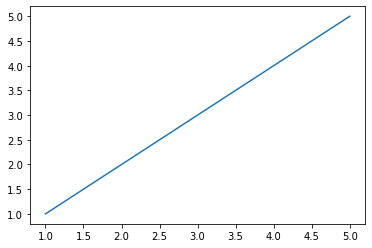

In [ ]:
plt.plot([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])
# если не добавить команду show(), то кроме самого графика, в ноутбуке отборазится ещё и название используемого объекта.
plt.show()

In [ ]:
import numpy as np

In [ ]:
# то же самое, но используем команду numpy для создания дискретного набора от 0 до 5 (50 точек)
x = np.linspace(0, 5, 50)
y = x

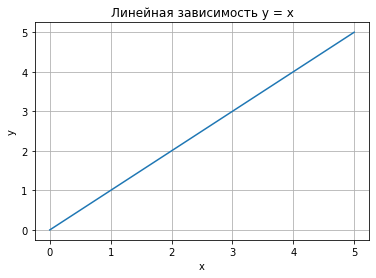

In [ ]:
plt.title("Линейная зависимость y = x") # подпись для заголовка
plt.xlabel("x") # подись для оси х
plt.ylabel("y") # подись для оси y
plt.grid()      # включение отображение крупной сетки
plt.plot(x, y)  
plt.show()

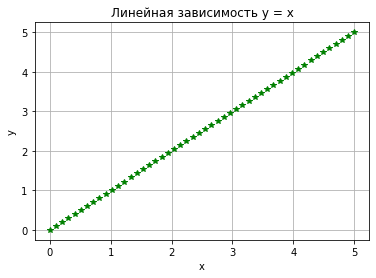

In [ ]:
plt.title("Линейная зависимость y = x") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.grid()
# можно менять цвет и формат вывода графика, вариантов много      
plt.plot(x, y, "g*")  
plt.show()

## Несколько графиков 

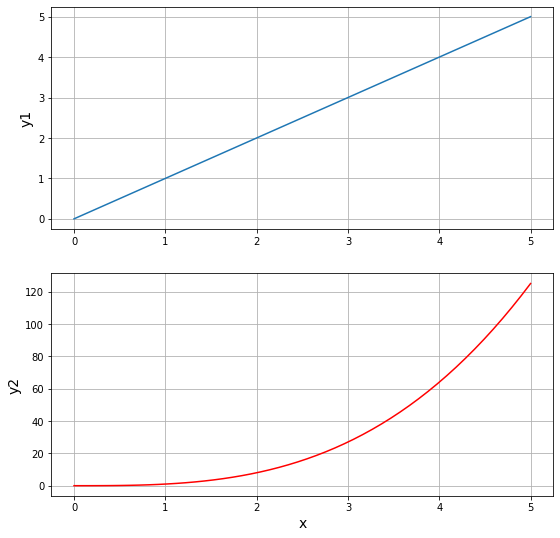

In [ ]:
y1 = x
y2 = [i**3 for i in x]

# Построение графиков
plt.figure(figsize=(9, 9)) #создаём фигуру и задаём её размеры
plt.subplot(2, 1, 1) #выбираем нужную фигуру
plt.plot(x, y1)               
plt.ylabel("y1", fontsize=14)
plt.grid(True)               
plt.subplot(2, 1, 2) #выбираем следующую фигуру
plt.plot(x, y2, c='r')               
plt.xlabel("x", fontsize=14)  
plt.ylabel("y2", fontsize=14) 
plt.grid(True)               

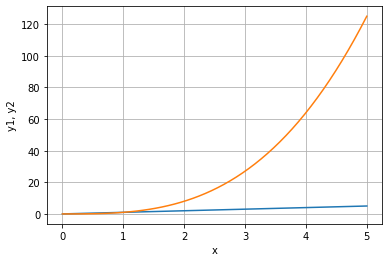

In [ ]:
# размер меньше, чем у фигур выше
# оба графика на одной фигуре
plt.xlabel("x")        
plt.ylabel("y1, y2")    
plt.grid()              
plt.plot(x, y1, x, y2) # цвета графиков будут задавать последовательно в стандартном порядке
plt.show()

На всякий случай мы подобрали картинку, которая показывает разные параметры фигуры в библиотеке matplotlib

![Разные параметры диаграммы.py](https://drive.google.com/uc?id=1Y1dDMy991toCzuLIb-tctWSs18FGzMfZ) 

## Диаграмма разброса точек

Следующий популярный вид графика - график разброса точек. При построении этого графика используем другой подход, нежели использовали раннее. Поработаем с объектами. 

Заметим, что получить график разброса точек можно и из обычного графка plot. Но при профессиональном использовании scatter даёт больше возможностей. 

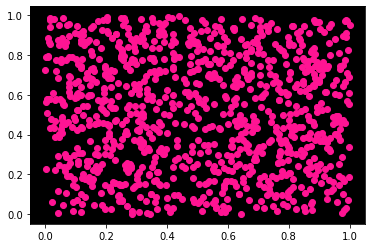

In [ ]:
x = np.random.rand(1000)    #  x - координаты точек
y = np.random.rand(1000)    #  y - координаты точек

fig, ax = plt.subplots()

ax.scatter(x, y, c = 'deeppink')    #  цвет точек

ax.set_facecolor('black')     #  цвет области Axes

plt.show()

Построим чуть более сложный вариант, на котором рзаместим данные разного типа.

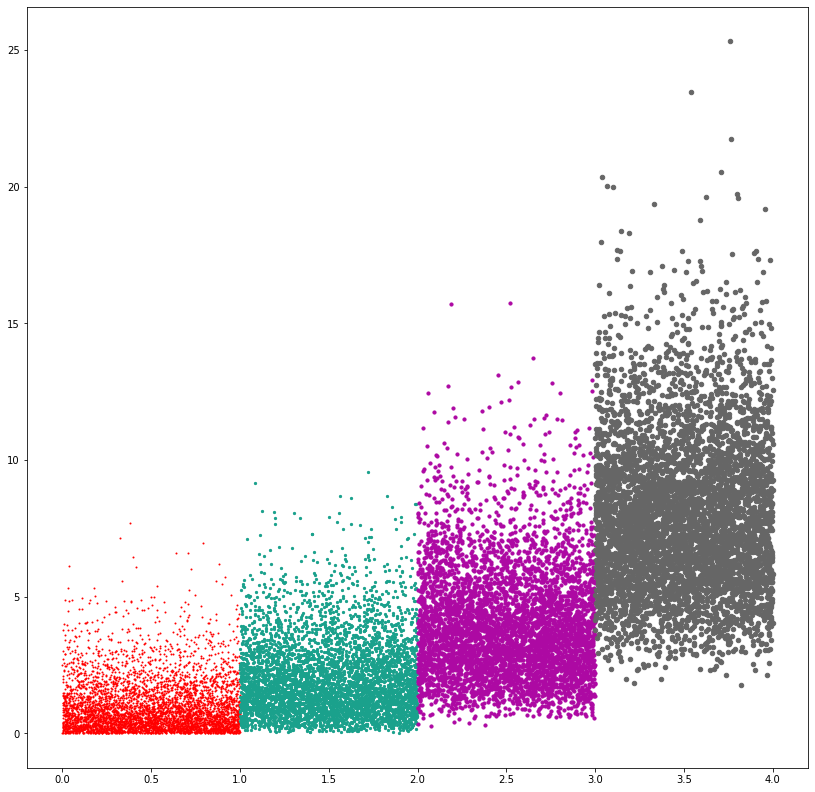

In [ ]:
x = np.random.rand(5000)
# создадим четыре варианта данных в случайном диапазоне, используя гамма-распределение (или любое другое)
# количество точек - 5000
y1 = np.random.gamma(1, size = 5000)
y2 = np.random.gamma(2, size = 5000)
y3 = np.random.gamma(4, size = 5000)
y4 = np.random.gamma(8, size = 5000)

fig, ax = plt.subplots()

# s определяет размер точек
# ключ цвета из {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}:
ax.scatter(x, y1, c = 'r', s = 1)
# RGB:
ax.scatter(x + 1, y2, c = [[0.1, 0.63, 0.55]], s = 5)
# hex RGB:
ax.scatter(x + 2, y3, c = '#ad09a3', s = 10)
# уровень серого в интервале [0, 1]:
ax.scatter(x + 3, y4, c = ['0.4'], s = 20)

#  Увеличим размер графика:
fig.set_figwidth(14)
fig.set_figheight(14)

plt.show()

## Гистограммы

Крайне популярный вариант диаграмм, который показывает сколько объектов (в общечеловеческом смысле) относятся к тому или иному типу. Иначе говоря, распределение объектов по разным типам или классам.

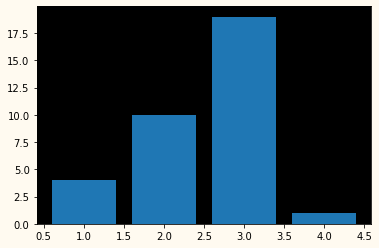

In [ ]:
x = np.arange(1, 5)
y = np.random.randint(1, 20, size = 4)

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_facecolor('black') # обратите внимание, что теперь можно явно видеть часть figure и часть axes на графике.
fig.set_facecolor('floralwhite')

plt.show()


Можно создавать несколько диаграм на разных частях фигуры. Для этого нужно использовать команду subplots. 

В случае с гистограммами это крайне важно, так как иначе они начинают перекрывать друг друга. 

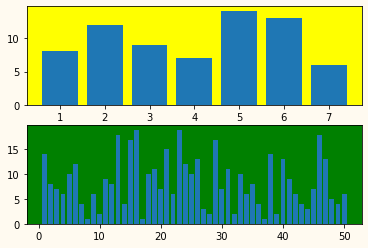

In [ ]:
x1 = np.arange(1, 8)
y1 = np.random.randint(1, 20, size = 7)
x2 = np.arange(1, 51)
y2 = np.random.randint(1, 20, size = 50)

fig, axes = plt.subplots(2, 1)

axes[0].bar(x1, y1)
axes[1].bar(x2, y2)

axes[0].set_facecolor('yellow')
axes[1].set_facecolor('green')
fig.set_facecolor('floralwhite')

plt.show()

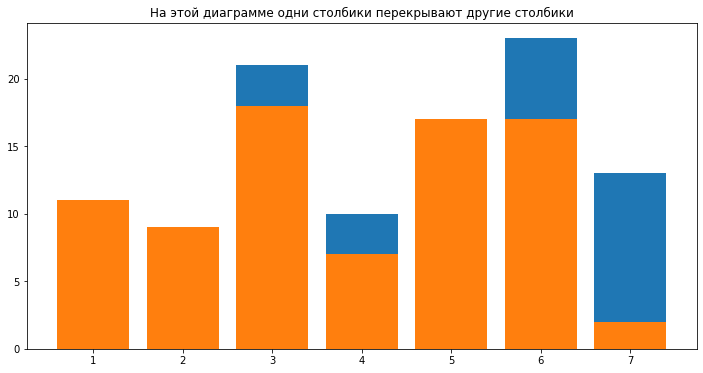

In [ ]:
x = np.arange(1, 8)
y1 = np.random.randint(1, 25, size = 7)
y2 = np.random.randint(1, 25, size = 7)

fig, ax = plt.subplots()

ax.bar(x, y1)
ax.bar(x, y2)

fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

ax.set_title('На этой диаграмме одни столбики перекрывают другие столбики')

plt.show()

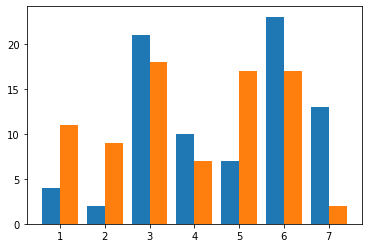

In [ ]:
fig, ax = plt.subplots()

ax.bar(x-0.2, y1, width = 0.4) #небольшой лайфхак, сдвигаем позицию X и влево 
# или вправо относительно центра расположения столбика, вместе с коррекцией 
# ширины столбика
ax.bar(x+0.2, y2, width = 0.4)

plt.show()

## Несколько других видов графиков

### Коррелограмма 

Данный вид графика используется для того, что визуализировать наличие корелляционной связи между различными рядами данных. Нам потребуется использовать графики такого типа. Для их использования необходимо подключить другой модуль seaborn. 

In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv") 
# обратите внимание, pandas способен считывать данные из файла по ссылке

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, 
            yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

NameError: ignored

### Парые зависимости

Ещё один функциональный вариант графиков, который пригодится при работе с наборами данных из модуля sns. Визуализирует разброс каждой пары данных. 

<Figure size 800x640 with 0 Axes>

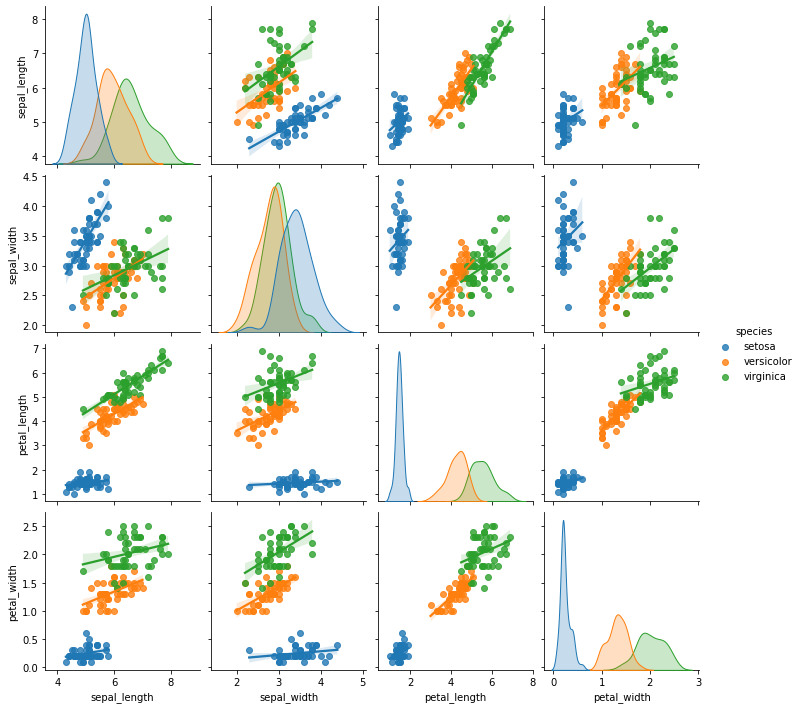

In [ ]:
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg", hue="species")
plt.show()

***Задание 1***

Скачать файл по ссылке https://disk.yandex.ru/d/ZeDbB3rqhIr1NA , считать через pandas. Получить список уникальных значений - стран в колонке "Country", отфильтровать и получить данные только по выпускникам колледжа. Убрать строки с пропусками в данных (NaN). (В случае ошибок типов можете конвертировать колонки к нужным типам через .astype(str) или .astype(int). Подсчитать макс значение, среднее и СКО для числа детей (household_children) в отфильтрованных данных.

In [ ]:
import matplotlib.pyplot as plt
df = pd.read_csv("/content/H1N1_Flu_Vaccines.csv")
#print(df.columns)
#колонки Country нет
df = df.loc[df['education'] == 'College Graduate']
df.dropna()
print(df['household_children'].max(), df['household_children'].mean(), df['household_children'].std())

3.0 0.552571598454068 0.9312789870583273


***Задание 2***

Скачать файл по ссылке https://disk.yandex.ru/i/uoN5eQE1qPCXCQ , считать через pandas второй лист (Olympics). Отфильтровать данные по России и золотым медалистам, построить график разброса возраст-вид_спорта. Построить линейный график на след данных - df.groupby('Year').Age.mean().dropna(). Сохранить графики в pdf. Отфильтровать изначальные данные только по летнему сезону, убрать колонку Город, создать колонку Год рождения, вычислить её через Возраст и Дату проведения, датафрейм сохранить вместе с графиками в архиве и скачать (командами, не через GUI).

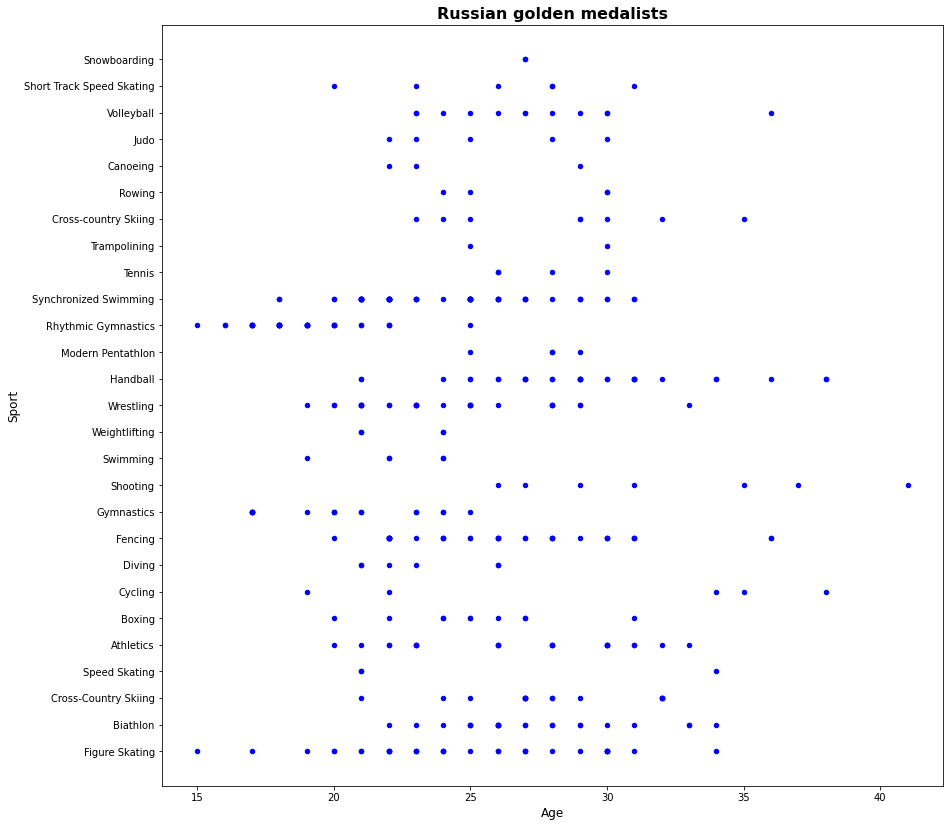

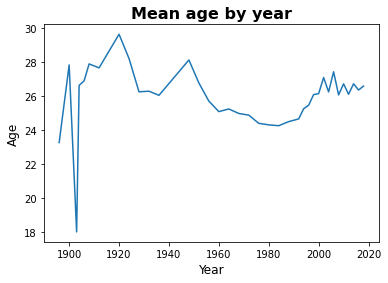

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, age_sp= plt.subplots()
xls = pd.ExcelFile("/content/Olympics 2018.xlsx")
df = pd.read_excel(xls, 'Olympics')

df1 = df.loc[(df['Team']=='Russia') & (df['Medal']=='GOLD')]

age_sp.scatter(df1['Age'], df1['Sport'], c = 'b', s = 20)

fig.set_figwidth(14)
fig.set_figheight(14)
plt.title('Russian golden medalists', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Sport', fontsize=12)
plt.show()
plt.savefig('/content/practice/Russian_gold.pdf')

year_pl = plt.subplot()
df2= df.groupby('Year').Age.mean().dropna()
plt.title('Mean age by year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Age', fontsize=12)
year_pl.plot(df2)
plt.show()
plt.savefig('/content/practice/Mean_age.pdf')

df3 = df.loc[df['Season']=='Summer']
df3 = df3.drop('City', axis=1)
df3['Birth Year'] = df3['Year'] - df3['Age']
df3.to_csv('/content/practice/df3.csv')

In [ ]:
!zip -r /content/practice2.zip /content/practice
from google.colab import files
files.download('/content/practice2.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Полезные ссылки

1. Большой [туториал](https://pyprog.pro/mpl/mpl_main_components.html) по matplotlib.
2. [50 различных графиков](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/) matplotlib и seaborn 